<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/proyecto-final/SL_II_Proyecto_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing

## Imports

In [54]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

### CNN models ###
# import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img #Augumentation of Images & visualization
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau # Checkpoints for training
from sklearn.model_selection import train_test_split #Spliting Data

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization


# Results Reporting
from keras.utils.vis_utils import plot_model # Visual Representation of Model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

#from sklearn.metrics import roc_curve, roc_auc_score
# from keras.utils import np_utils
# from keras.regularizers import l2
# from tensorflow.keras.optimizers import SGD, RMSprop
# from tensorflow.keras.utils import to_categorical
# from keras.layers import Input, GlobalAveragePooling2D,concatenate
# from keras.models import Model
# from tensorflow.keras import layers
# from keras.applications.inception_v3 import InceptionV3
# from sklearn.metrics import accuracy_score

## Hyperparameters

In [2]:
batch_size = 32
num_epochs = 10
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = '/content/drive/MyDrive/Statistical-Learning-II/proyecto/CNN/'
shape_x = 48
shape_y = 48
image_size=(48,48)

## Data Loading

In [3]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
data = pd.read_csv(base_path + "fer2013.csv")
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Preprocessing

In [6]:
data['pixels']=data['pixels'].astype("string")
pixels = data['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(data['emotion']).to_numpy()

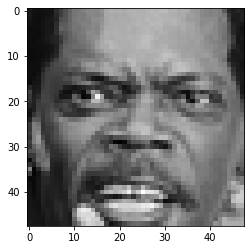

In [27]:
testX = faces[10]
np.squeeze(testX, axis=2).shape
testX =  np.reshape(testX, (48,48))
plt.imshow(testX, cmap="gray")

## Data Augmentation

In [28]:
datagen = ImageDataGenerator(
        zoom_range=0.2,          # randomly zoom into images
        rotation_range=10,       # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,    # randomly flip images
        vertical_flip=False)     # randomly flip images
  

## Spliting Data

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

# Model Selection & Training

## CNN
https://arxiv.org/pdf/1307.0414.pdf

In [32]:
def CNN():
    model = Sequential(name='CNN')
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    # model.add(Conv2D(256, (3, 3), padding='same'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    # model.add(Dropout(0.25))

    # model.add(Conv2D(512, (3, 3), padding='same'))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    # model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    return model

In [33]:
CNN=CNN()

In [34]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)       512     

## Checkpints and Callbacks

In [35]:
early_stop = EarlyStopping('val_loss', patience=100)

#reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  #patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'CNN'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop]
# callbacks = [model_checkpoint, early_stop, reduce_lr]

## Training

In [36]:
CNN_history =CNN.fit(datagen.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xval,yval))

Epoch 1/10
785/785 [==============================] - 334s 423ms/step - loss: 1.8097 - accuracy: 0.2877 - val_loss: 1.5871 - val_accuracy: 0.3944

Epoch 00001: val_loss improved from inf to 1.58710, saving model to /content/drive/MyDrive/Statistical-Learning-II/proyecto/CNN/CNN.01-0.39.hdf5
Epoch 2/10
785/785 [==============================] - 330s 421ms/step - loss: 1.6247 - accuracy: 0.3646 - val_loss: 1.4838 - val_accuracy: 0.4110

Epoch 00002: val_loss improved from 1.58710 to 1.48382, saving model to /content/drive/MyDrive/Statistical-Learning-II/proyecto/CNN/CNN.02-0.41.hdf5
Epoch 3/10
785/785 [==============================] - 330s 420ms/step - loss: 1.5305 - accuracy: 0.4094 - val_loss: 1.4148 - val_accuracy: 0.4595

Epoch 00003: val_loss improved from 1.48382 to 1.41481, saving model to /content/drive/MyDrive/Statistical-Learning-II/proyecto/CNN/CNN.03-0.46.hdf5
Epoch 4/10
785/785 [==============================] - 329s 419ms/step - loss: 1.4713 - accuracy: 0.4291 - val_loss: 

## Restoring Model to keep Training

## Intermedia Layer Filter Visualization

# Results Reporting

## plotting

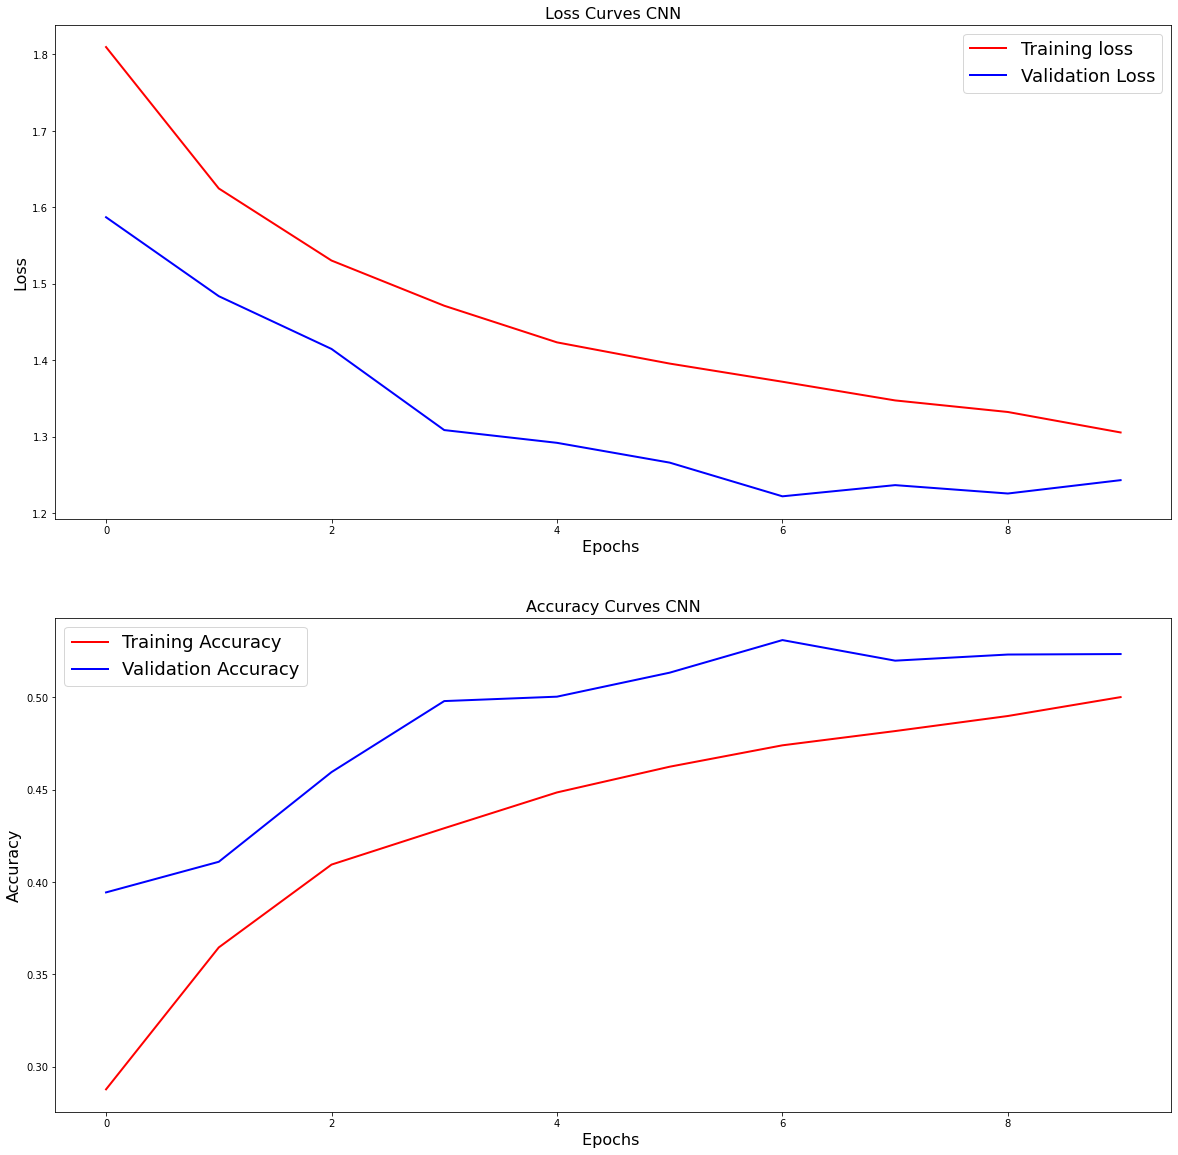

In [46]:
fig,(ax1, ax2) =plt.subplots(2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history}.items(),axes):
  
    ax1.plot(history.history['loss'],'r',linewidth=2.0)
    ax1.plot(history.history['val_loss'],'b',linewidth=2.0)
    ax1.legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax1.set_xlabel('Epochs ',fontsize=16)
    ax1.set_ylabel('Loss',fontsize=16)
    ax1.set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax2.plot(history.history['accuracy'],'r',linewidth=2.0)
    ax2.plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax2.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax2.set_xlabel('Epochs ',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=16)
    ax2.set_title('Accuracy Curves '+m,fontsize=16)

## Classification reports

In [53]:
model = CNN
ypred=model.predict(xtest)
ypred_=np.argmax(ypred, axis=1)
ytest_=np.argmax(ytest, axis=1)
print(classification_report(ytest_, ypred_,digits=3))
    

              precision    recall  f1-score   support

           0      0.380     0.541     0.446       451
           1      0.517     0.341     0.411        44
           2      0.462     0.222     0.300       469
           3      0.613     0.908     0.732       782
           4      0.632     0.127     0.212       565
           5      0.622     0.710     0.663       355
           6      0.482     0.561     0.518       565

    accuracy                          0.530      3231
   macro avg      0.530     0.487     0.469      3231
weighted avg      0.539     0.530     0.489      3231



## Confusion Matrix

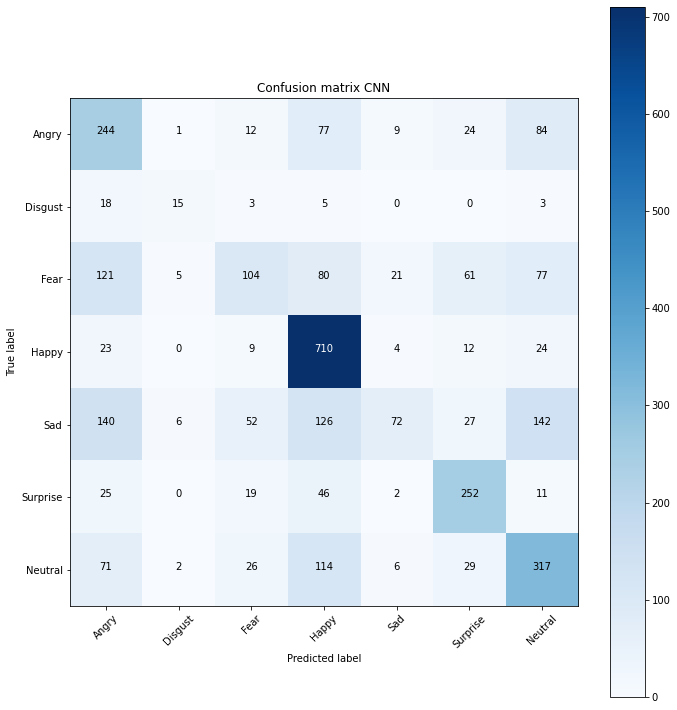

In [55]:
model = CNN
fig = figure(figsize=(10, 10))
    
ypred=model.predict(xtest)
rounded_predections=np.argmax(ypred, axis=1)
rounded_labels=np.argmax(ytest, axis=1)
cm = confusion_matrix(rounded_labels, rounded_predections)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix '+model.name
    

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('confusion_matrix_'+model.name+'.png')
plt.show()

## Model Summary

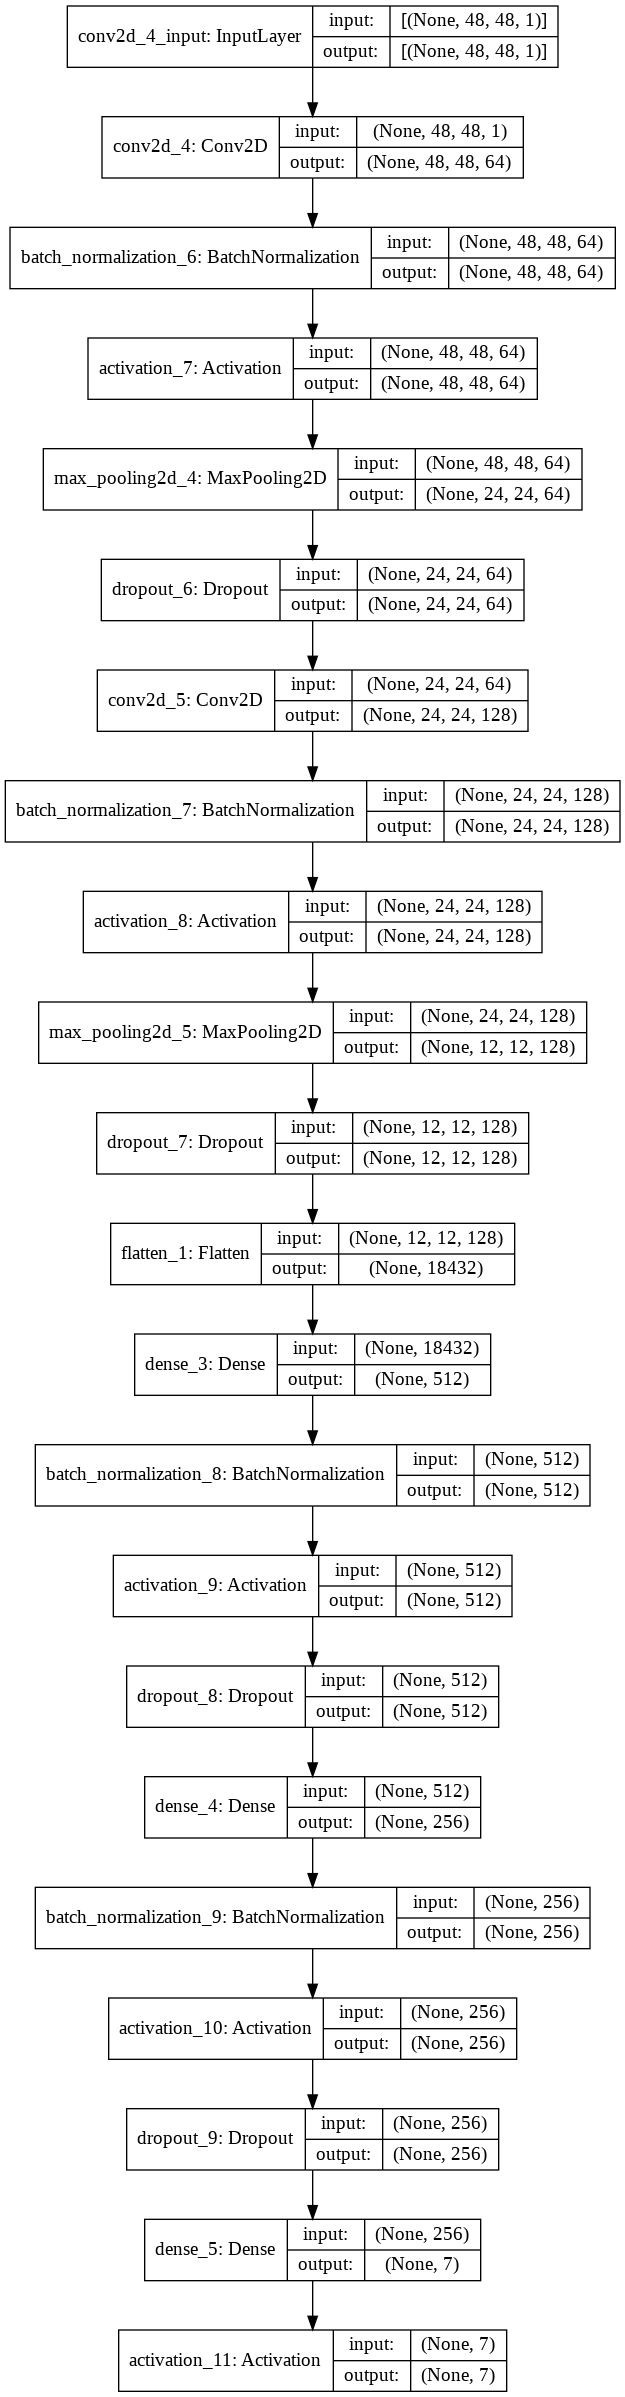

In [56]:
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)